In [1]:
# 智能供应链和评分卡模型

In [1]:
#!/usr/bin/env python
# coding: utf-


import pandas as pd

import os
path = os.path.expanduser('~/data/smart_logistics/')

In [2]:
# 数据加载
dataset = pd.read_csv(path + 'SupplyChain.csv', encoding='unicode_escape')
dataset

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [3]:
print(dataset.shape)
print(dataset.isnull().sum())


print(dataset[['Customer Fname', 'Customer Lname']])

(180519, 53)
Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                     

In [4]:
#  fistname与lastname进行合并
dataset['Customer Full Name'] = dataset['Customer Fname'] +dataset['Customer Lname']
#dataset.head()
dataset['Customer Zipcode'].value_counts()

725.0      66770
921.0        337
23455.0      334
957.0        297
79109.0      292
           ...  
60636.0       18
89015.0       16
32210.0       15
7728.0        13
11225.0        9
Name: Customer Zipcode, Length: 995, dtype: int64

In [5]:
# 查看缺失值，发现有3个缺失值
print(dataset['Customer Zipcode'].isnull().sum())

3


In [6]:
dataset['Customer Zipcode'] = dataset['Customer Zipcode'].fillna(0)
dataset.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,CallyHolloway
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,IreneLuna
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class,GillianMaldonado
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class,TanaTate
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class,OrliHendricks


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# 特征字段之间相关性 热力图
data = dataset
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:>

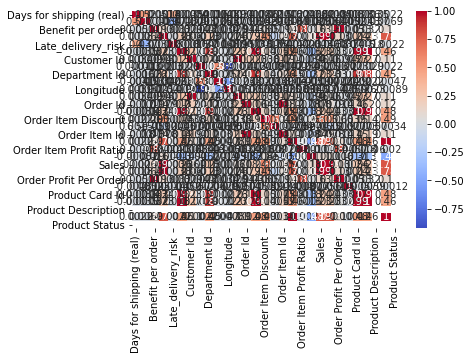

In [9]:
# annot=True 显示具体数字
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
# 结论：可以观察到Product Price和Sales，Order Item Total有很高的相关性


In [10]:
# 基于Market进行聚合
market = data.groupby('Market')

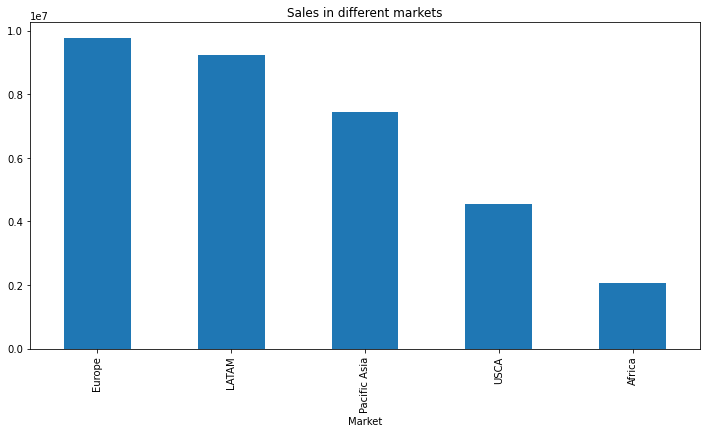

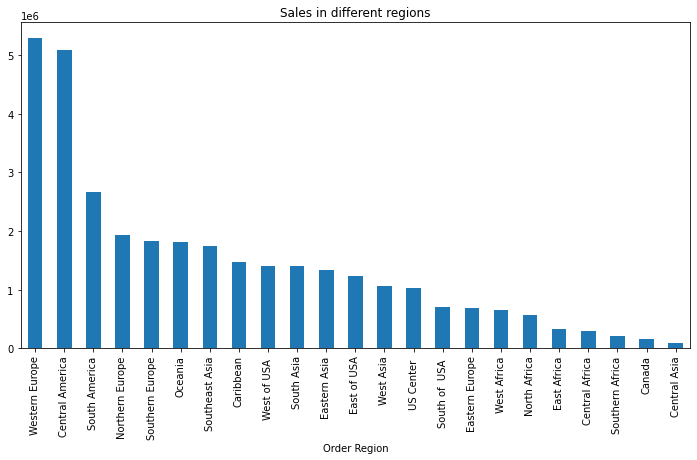

In [11]:
# 基于Region进行聚合
region = data.groupby('Order Region')
plt.figure(1)
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title='Sales in different markets')
plt.figure(2)
region['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title='Sales in different regions')
plt.show()

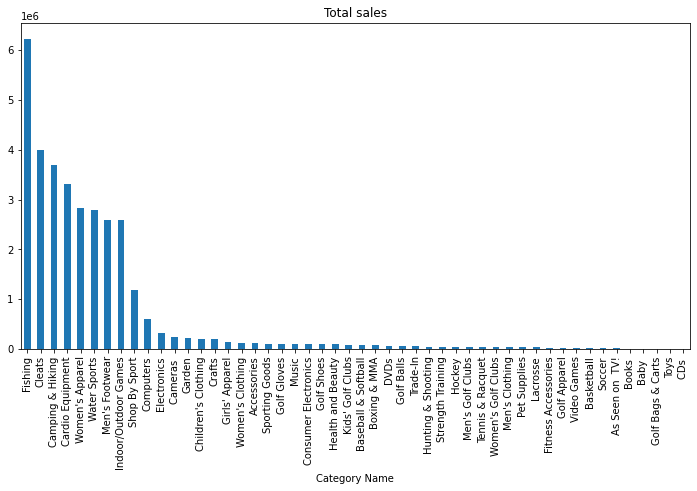

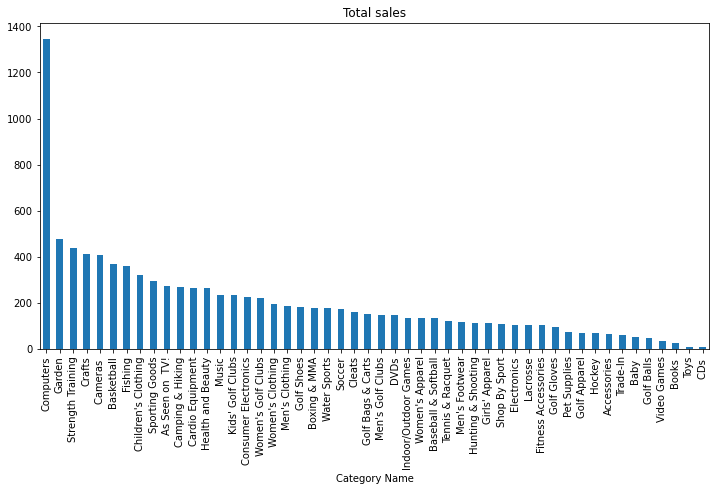

In [12]:
# 基于Category Name进行聚类
cat = data.groupby('Category Name')
plt.figure(1)
# 不同类别的 总销售额
cat['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title='Total sales')
plt.figure(2)
# 不同类别的 平均销售额
cat['Sales per customer'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title='Total sales')
plt.show()

In [13]:
#data['order date (DateOrders)']
# 创建时间戳索引
temp = pd.DatetimeIndex(data['order date (DateOrders)'])
temp

DatetimeIndex(['2018-01-31 22:56:00', '2018-01-13 12:27:00',
               '2018-01-13 12:06:00', '2018-01-13 11:45:00',
               '2018-01-13 11:24:00', '2018-01-13 11:03:00',
               '2018-01-13 10:42:00', '2018-01-13 10:21:00',
               '2018-01-13 10:00:00', '2018-01-13 09:39:00',
               ...
               '2016-01-16 06:49:00', '2016-01-16 06:49:00',
               '2016-01-16 06:28:00', '2016-01-16 06:07:00',
               '2016-01-16 05:04:00', '2016-01-16 03:40:00',
               '2016-01-16 01:34:00', '2016-01-15 21:00:00',
               '2016-01-15 20:18:00', '2016-01-15 18:54:00'],
              dtype='datetime64[ns]', name='order date (DateOrders)', length=180519, freq=None)

In [14]:
# 取order date (DateOrders)字段中的year, month, weekday, hour, month_year
data['order_year'] = temp.year
data['order_month'] = temp.month
data['order_week_day'] = temp.weekday
data['order_hour'] = temp.hour
data['order_month_year'] = temp.to_period('M')
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,order_month_year
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,327.75,0,2/3/2018 22:56,Standard Class,CallyHolloway,2018,1,2,22,2018-01
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,327.75,0,1/18/2018 12:27,Standard Class,IreneLuna,2018,1,5,12,2018-01
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,327.75,0,1/17/2018 12:06,Standard Class,GillianMaldonado,2018,1,5,12,2018-01
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,327.75,0,1/16/2018 11:45,Standard Class,TanaTate,2018,1,5,11,2018-01
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,327.75,0,1/15/2018 11:24,Standard Class,OrliHendricks,2018,1,5,11,2018-01


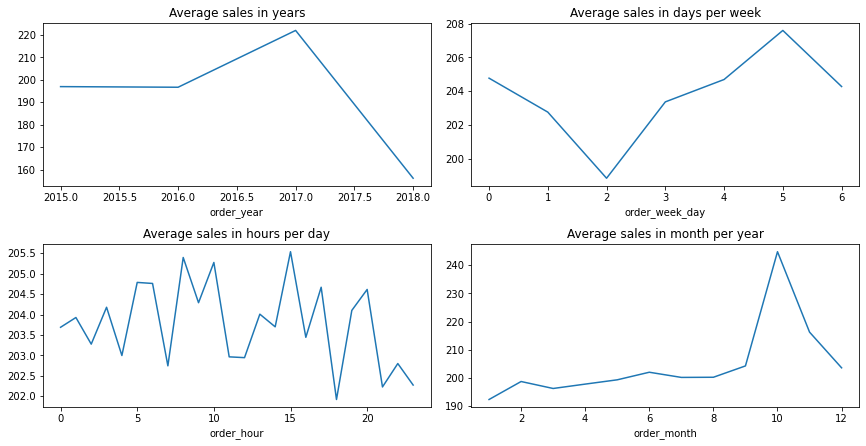

In [15]:
# 对销售额进行探索，按照不同时间维度 年，星期，小时，月
plt.figure(figsize=(10, 12))
plt.subplot(4, 2, 1)
df_year = data.groupby('order_year')
df_year['Sales'].mean().plot(figsize=(12, 12), title='Average sales in years')
plt.subplot(4, 2, 2)
df_day = data.groupby('order_week_day')
df_day['Sales'].mean().plot(figsize=(12, 12), title='Average sales in days per week')
plt.subplot(4, 2, 3)
df_hour = data.groupby('order_hour')
df_hour['Sales'].mean().plot(figsize=(12, 12), title='Average sales in hours per day')
plt.subplot(4, 2, 4)
df_month = data.groupby('order_month')
df_month['Sales'].mean().plot(figsize=(12, 12), title='Average sales in month per year')
plt.tight_layout()
plt.show()

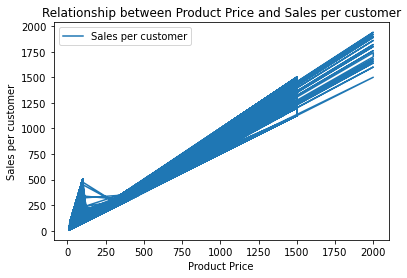

In [16]:
# 探索商品价格与 销售额之间的关系
data.plot(x='Product Price', y='Sales per customer') 
plt.title('Relationship between Product Price and Sales per customer')
plt.xlabel('Product Price')
plt.ylabel('Sales per customer')
plt.show()

In [17]:
# # 用户分层 RF
data['TotalPrice'] = data['Order Item Quantity'] * data['Order Item Total']
data[['TotalPrice', 'Order Item Quantity', 'Order Item Total']]

,TotalPrice,Order Item Quantity,Order Item Total
0,314.640015,1,314.640015
1,311.359985,1,311.359985
2,309.720001,1,309.720001
3,304.809998,1,304.809998
4,298.250000,1,298.250000
...,...,...,...
180514,399.980011,1,399.980011
180515,395.980011,1,395.980011
180516,391.980011,1,391.980011
180517,387.980011,1,387.980011


In [18]:
# 时间类型转换
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

In [19]:
# 统计最后一笔订单的时间
data['order date (DateOrders)'].max()

Timestamp('2018-01-31 23:38:00')

In [20]:
# 假设我们现在是2018-2-1
import datetime

In [21]:
present = datetime.datetime(2018,2,1)

In [22]:
# 计算每个用户的RFM指标
# 按照Order Customer Id进行聚合，
customer_seg = data.groupby('Order Customer Id').agg({'order date (DateOrders)': lambda x: (present-x.max()).days,                                                       'Order Id': lambda x:len(x), 'TotalPrice': lambda x: x.sum()})
customer_seg

,order date (DateOrders),Order Id,TotalPrice
Order Customer Id,,,
1,792,1,2362.250061
2,136,10,2842.700073
3,229,18,6143.760057
4,380,14,4370.629991
5,457,7,2993.790032
...,...,...,...
20753,0,1,161.869995
20754,0,1,172.660004
20755,0,1,314.640015


In [23]:
# 将字段名称改成 R，F，M
customer_seg.rename(columns={'order date (DateOrders)': 'R_Value', 'Order Id': 'F_Value', 'TotalPrice': 'M_Value'}, inplace=True)
customer_seg.head()

,R_Value,F_Value,M_Value
Order Customer Id,,,
1,792,1,2362.250061
2,136,10,2842.700073
3,229,18,6143.760057
4,380,14,4370.629991
5,457,7,2993.790032


In [24]:
# 将RFM数据划分为4个尺度
quantiles = customer_seg.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()
quantiles

{'R_Value': {0.25: 75.0, 0.5: 159.0, 0.75: 307.0},
 'F_Value': {0.25: 1.0, 0.5: 7.0, 0.75: 15.0},
 'M_Value': {0.25: 258.0400085, 0.5: 2573.794999195, 0.75: 6003.142553865}}

In [25]:
# R_Value越小越好 => R_Score就越大
def R_Score(a, b, c):
    if a <= c[b][0.25]:
        return 4
    elif a <= c[b][0.50]:
        return 3
    elif a <= c[b][0.75]:
        return 2
    else:
        return 1

In [26]:
# F_Value, M_Value越大越好
def FM_Score(a, b, c):
    if a <= c[b][0.25]:
        return 1
    elif a <= c[b][0.50]:
        return 2
    elif a <= c[b][0.75]:
        return 3
    else:
        return 4

In [27]:
# 新建R_Score字段，用于将R_Value => [1,4]
customer_seg['R_Score']  = customer_seg['R_Value'].apply(R_Score, args=("R_Value", quantiles))
# 新建F_Score字段，用于将F_Value => [1,4]
customer_seg['F_Score']  = customer_seg['F_Value'].apply(FM_Score, args=("F_Value", quantiles))
# 新建M_Score字段，用于将R_Value => [1,4]
customer_seg['M_Score']  = customer_seg['M_Value'].apply(FM_Score, args=("M_Value", quantiles))
customer_seg.head()

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score
Order Customer Id,,,,,,
1,792,1,2362.250061,1,1,2
2,136,10,2842.700073,3,3,3
3,229,18,6143.760057,2,4,4
4,380,14,4370.629991,1,3,3
5,457,7,2993.790032,1,2,3


In [28]:
# 计算RFM用户分层
def RFM_User(df):
    if df['M_Score'] > 2 and df['F_Score'] > 2 and df['R_Score'] > 2:
        return '重要价值用户'
    if df['M_Score'] > 2 and df['F_Score'] <= 2 and df['R_Score'] > 2:
        return '重要发展用户'
    if df['M_Score'] > 2 and df['F_Score'] > 2 and df['R_Score'] <= 2:
        return '重要保持用户'
    if df['M_Score'] > 2 and df['F_Score'] <= 2 and df['R_Score'] <= 2:
        return '重要挽留用户'

    if df['M_Score'] <= 2 and df['F_Score'] > 2 and df['R_Score'] > 2:
        return '一般价值用户'
    if df['M_Score'] <= 2 and df['F_Score'] <= 2 and df['R_Score'] > 2:
        return '一般发展用户'
    if df['M_Score'] <= 2 and df['F_Score'] > 2 and df['R_Score'] <= 2:
        return '一般保持用户'
    if df['M_Score'] <= 2 and df['F_Score'] <= 2 and df['R_Score'] <= 2:
        return '一般挽留用户'


customer_seg['Customer_Segmentation'] = customer_seg.apply(RFM_User, axis=1)
customer_seg

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,Customer_Segmentation
Order Customer Id,,,,,,,
1,792,1,2362.250061,1,1,2,一般挽留用户
2,136,10,2842.700073,3,3,3,重要价值用户
3,229,18,6143.760057,2,4,4,重要保持用户
4,380,14,4370.629991,1,3,3,重要保持用户
5,457,7,2993.790032,1,2,3,重要挽留用户
...,...,...,...,...,...,...,...
20753,0,1,161.869995,4,1,1,一般发展用户
20754,0,1,172.660004,4,1,1,一般发展用户
20755,0,1,314.640015,4,1,2,一般发展用户


In [29]:
# ## EDA 对于欺诈订单进行探


# 查看交易的方式
data['Type'].unique()


array(['DEBIT', 'TRANSFER', 'CASH', 'PAYMENT'], dtype=object)

In [30]:
# 显示不同地区的支付类型情况
import numpy as np

In [31]:
#pay_type = data.groupby('Type')

In [32]:
# 获取4种支付方式的数据
pay_type1 = data[(data['Type'] == 'TRANSFER')]
pay_type2= data[(data['Type'] == 'CASH')]
pay_type3= data[(data['Type'] == 'PAYMENT')]
pay_type4= data[(data['Type'] == 'DEBIT')]

In [33]:
# 获取4种支付方式中，不同地区的特点
count1=pay_type1['Order Region'].value_counts()
count2=pay_type2['Order Region'].value_counts()
count3=pay_type3['Order Region'].value_counts()
count4=pay_type4['Order Region'].value_counts()

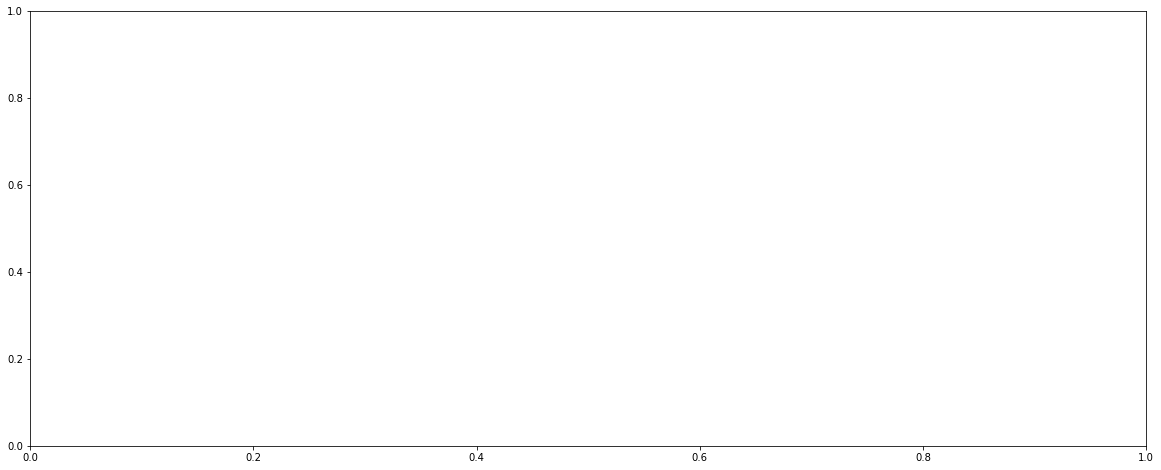

In [34]:
# 获取地区region的个数
region_num = len(count1)
fig,ax = plt.subplots(figsize=(20,8))
index=np.arange(region_num)

In [35]:
# 每种类型的显示间隔
bar_width=0.2

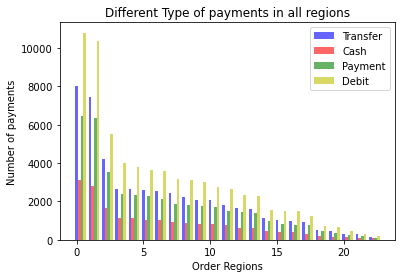

In [36]:
# 不透明度设置
opacity=0.6
type1=plt.bar(index,count1,bar_width,alpha=opacity,color='b',label='Transfer')
type2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='r',label='Cash')
type3=plt.bar(index+bar_width+bar_width,count3,bar_width,alpha=opacity,color='g',label='Payment')
type4=plt.bar(index+bar_width+bar_width+bar_width,count4,bar_width,alpha=opacity,color='y',label='Debit')
plt.xlabel('Order Regions')
plt.ylabel('Number of payments')
plt.title('Different Type of payments in all regions')
plt.legend()

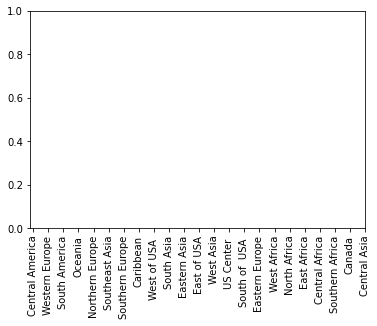

In [37]:
# 显示刻度
names=data['Order Region'].value_counts().keys()
#plt.xticks(index+bar_width,names,rotation=90)
plt.xticks(index+bar_width,names,rotation='vertical')
# tight_layout会自动调整子图参数，使之填充整个图像区域
#plt.tight_layout()
plt.show()

In [38]:
# 分析结论：
# Debit（借记）是所有地区中使用最多的支付方式
# Cash（现金）是所有地区中使用最少的支付方

Total revenue lost with orders -3883547.345768667


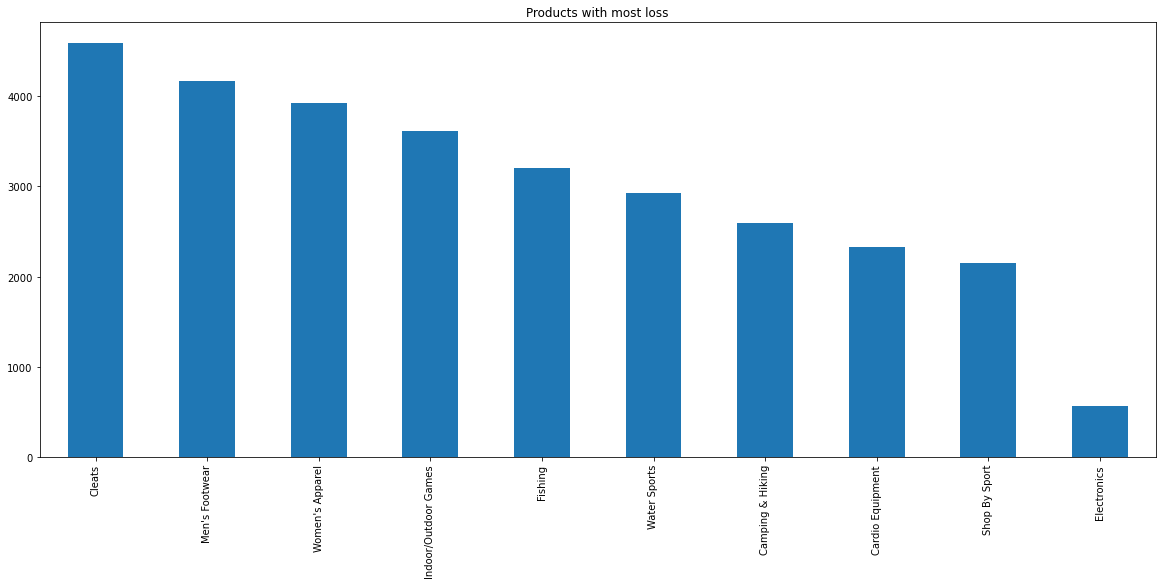

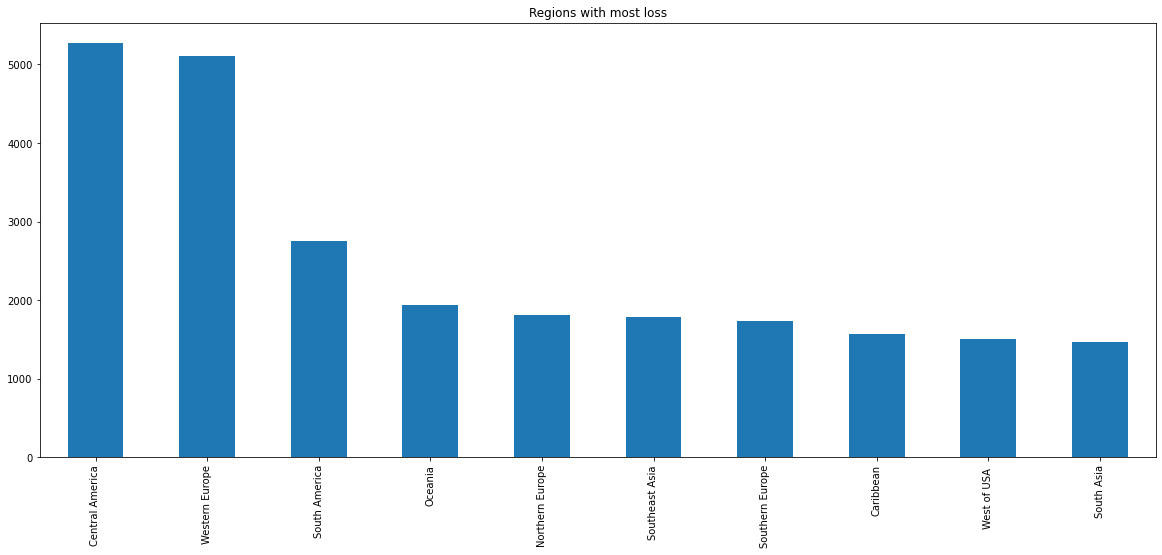

In [39]:
# 对负收益的产品进行探索
loss = data[(data['Benefit per order']<0)]
# 显示最大的负收益产品 Top10
plt.figure(1)
loss['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Products with most loss")
# 显示最大的负收益地区 Top10
plt.figure(2)
loss['Order Region'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Regions with most loss")
# 所有负收益产品带来的损失
print('Total revenue lost with orders',loss['Benefit per order'].sum())

In [40]:
# 负收益，有可能来自欺诈交易，那么会采用哪种支付方式
xyz = data[(data['Order Status'] == 'SUSPECTED_FRAUD') & (data['Type'] != 'TRANSFER')]
#xyz = data[(data['Order Status'] == 'SUSPECTED_FRAUD') & (data['Type'] == 'TRANSFER')]
xyz['Order Region'].value_counts()

Series([], Name: Order Region, dtype: int64)

<AxesSubplot:>

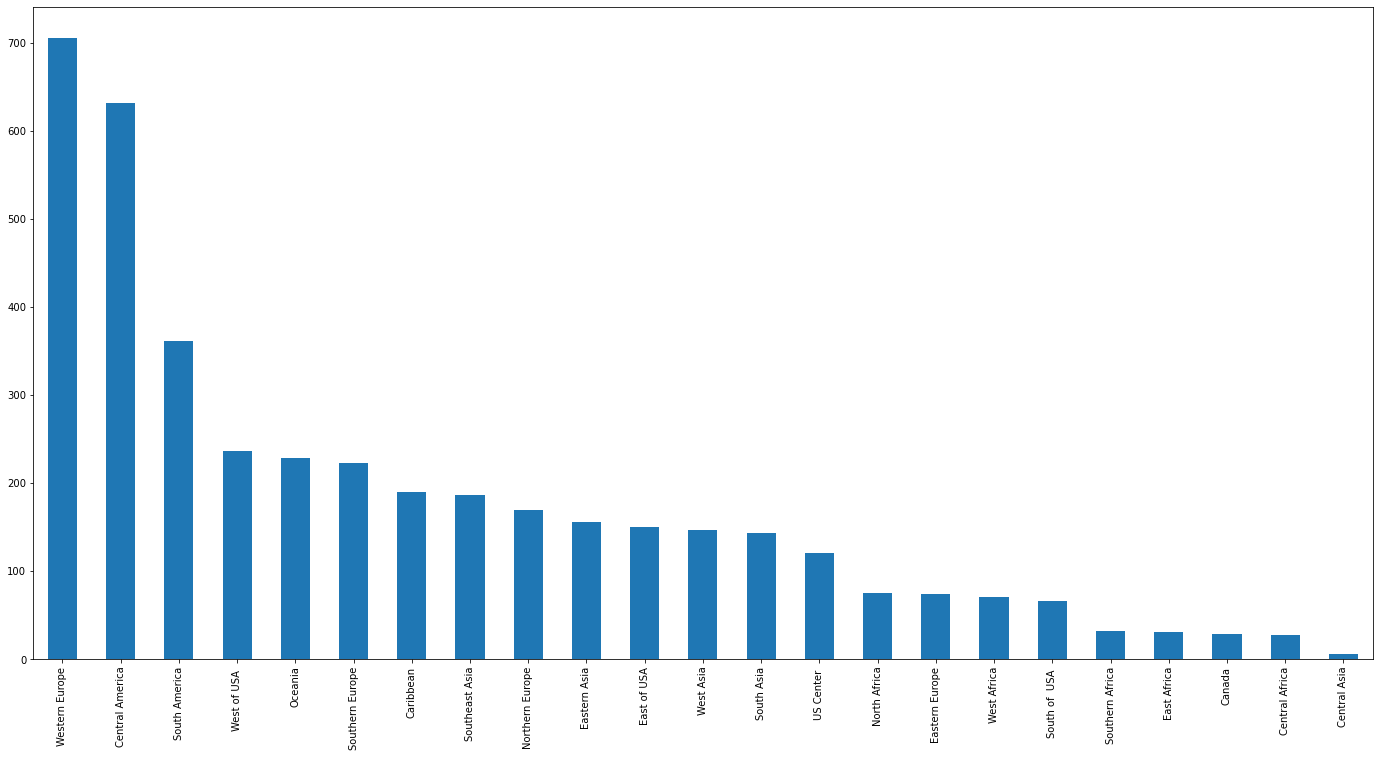

In [41]:
# 发现TRANSFER容易导致欺诈交易
# 显示不同地区的欺诈交易情况
high_fraud = data[(data['Order Status'] == 'SUSPECTED_FRAUD') & (data['Type'] == 'TRANSFER')]
high_fraud['Order Region'].value_counts().plot.bar(figsize=(24,12))

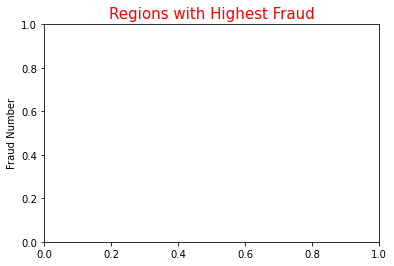

In [42]:
# 显示标题
plt.title("Regions with Highest Fraud",size=15,color='r')
plt.ylabel("Fraud Number")
plt.show()

In [43]:
# Western Europe地区欺诈交易最多，将一个bar分成2个部分（堆积条形图）：分别为总欺诈数量 与 Western Europe的欺诈数量 
high_fraud_total = data[(data['Order Status'] == 'SUSPECTED_FRAUD')]
high_fraud_we = data[(data['Order Status'] == 'SUSPECTED_FRAUD') &(data['Order Region'] == 'Western Europe')]

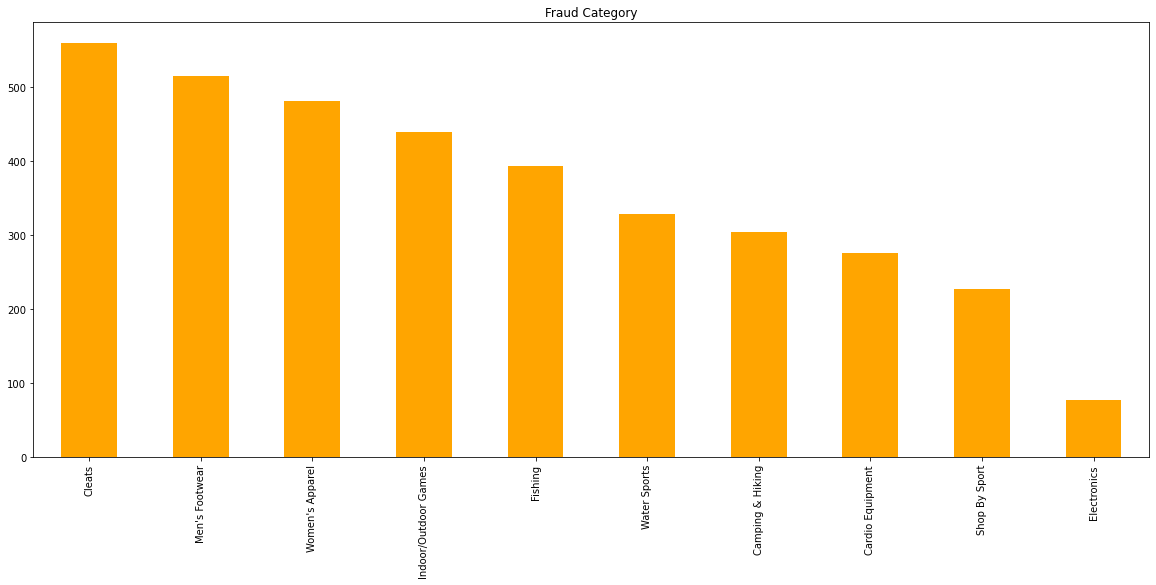

In [44]:
# 找出风险最高的10个Category
fraud1=high_fraud_total['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Fraud Category",color='orange')

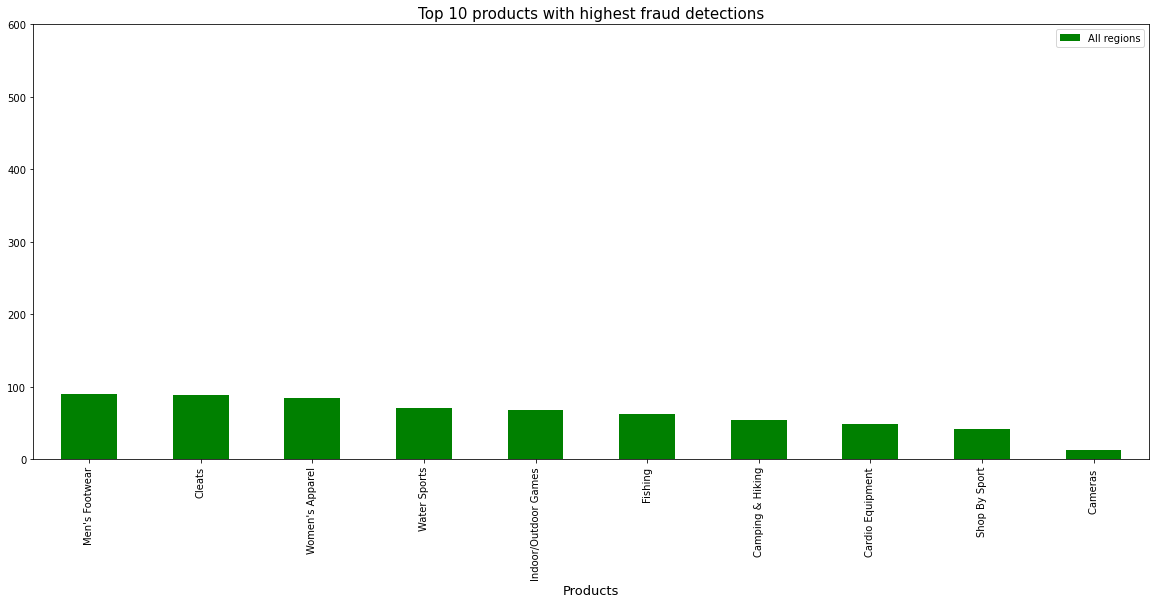

In [45]:
# 找出这些风险在Western Europe中的情况
fraud2=high_fraud_we['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Fraud product in Western Europe",color='green')
plt.legend(["All regions", "Western Europe"])
plt.title("Top 10 products with highest fraud detections", size=15)
plt.xlabel("Products", size=13)
plt.ylim(0,600)
plt.show()

<AxesSubplot:title={'center':'Top 10 Highest Fraud Customers'}>

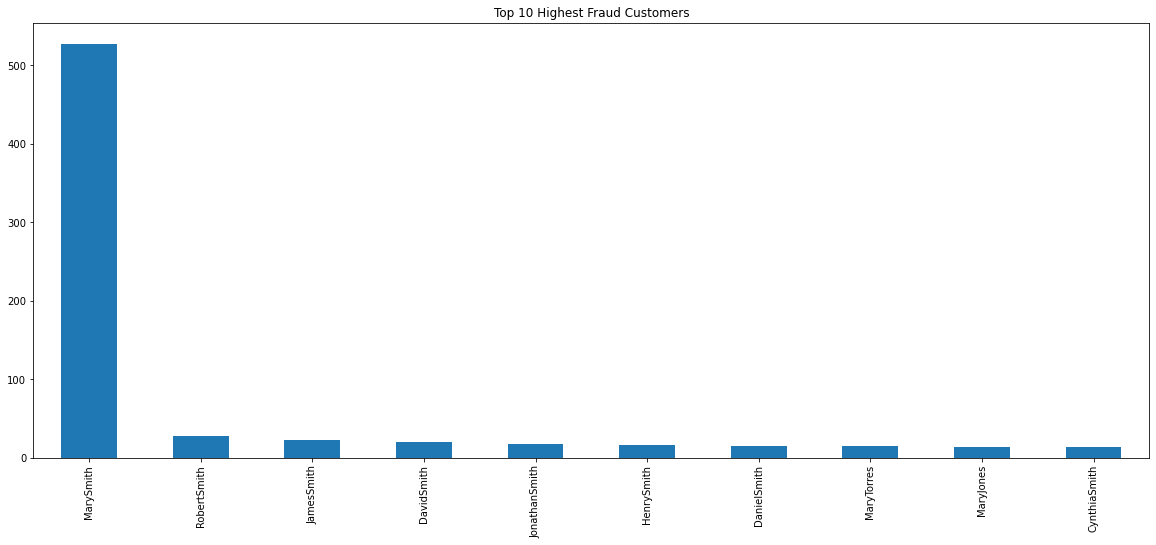

In [46]:
# 筛选出Top10 风险Customer
cus = data[(data['Order Status'] == 'SUSPECTED_FRAUD')] 
#Top 10 customers with most fraud
cus['Customer Full Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Top 10 Highest Fraud Customers")

In [47]:
# 找到MarySmith的交易金额
amount = data[(data['Customer Full Name'] == 'MarySmith')&(data['Order Status'] == 'SUSPECTED_FRAUD')]
amount['Sales'].sum()

102491.66191043999

In [48]:
import pickle
with open('data.pkl', 'wb') as file:
    pickle.dump(data, file)

In [49]:
## prediction

In [50]:
#!/usr/bin/env python
# coding: utf-8

In [51]:
"""
    使用XGBoost，采用五折交叉验证
    MAE = 497
    
    模型融合
    1）相同模型下的 多个子模型，比如 都使用XGBoost, 采用5个子模型进行融合
    2）不同模型的融合，比如 XGBoost + LightGBM
    
    
    模型融合 不是在模型内进行融合
    而是对于模型的预测结果，进行加权平均（即融合）
    有几个模型，就有几个模型预测的结果
    然后对 预测结果，进行加权平均 ( 相加/5 )
    
    什么情况下模型融合不好？
    1） 与一个坏的模型进行融合， X MAE = 1000, XGBoost= 509, 一起融合
   
    
    MAE = Mean Absolute Error
    518， 521， 530， 513, 580 => 497
"""

'\n    使用XGBoost，采用五折交叉验证\n    MAE = 497\n    \n    模型融合\n    1）相同模型下的 多个子模型，比如 都使用XGBoost, 采用5个子模型进行融合\n    2）不同模型的融合，比如 XGBoost + LightGBM\n    \n    \n    模型融合 不是在模型内进行融合\n    而是对于模型的预测结果，进行加权平均（即融合）\n    有几个模型，就有几个模型预测的结果\n    然后对 预测结果，进行加权平均 ( 相加/5 )\n    \n    什么情况下模型融合不好？\n    1） 与一个坏的模型进行融合， X MAE = 1000, XGBoost= 509, 一起融合\n   \n    \n    MAE = Mean Absolute Error\n    518， 521， 530， 513, 580 => 497\n'

In [52]:
import pandas as pd

In [53]:
# 数据加载
train_data = pd.read_csv(path + '/used_car_train_20200313.csv', sep=' ')
test = pd.read_csv(path + "/used_car_testB_20200421.csv", sep = ' ')
test

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,...,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,...,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,...,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,...,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,...,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,249995,111443,20041005,4.0,4,0.0,NaN,1.0,150,15.0,...,0.263668,0.000292,0.141804,0.076393,0.039272,2.072901,-2.531869,1.716978,-1.063437,0.326587
49996,249996,152834,20130409,65.0,1,0.0,0.0,0.0,179,4.0,...,0.255310,0.000991,0.155868,0.108425,0.067841,1.358504,-3.290295,4.269809,0.140524,0.556221
49997,249997,132531,20041211,4.0,4,0.0,0.0,1.0,147,12.5,...,0.262933,0.000318,0.141872,0.071968,0.042966,2.165658,-2.417885,1.370612,-1.073133,0.270602
49998,249998,143405,20020702,40.0,1,4.0,0.0,1.0,176,15.0,...,0.282106,0.000023,0.067483,0.067526,0.009006,2.030114,-2.939244,0.569078,-1.718245,0.316379


In [54]:
# # 缺失值补


train_data['notRepairedDamage'].value_counts()


train_data['notRepairedDamage'].replace('-', '0.0', inplace=True)
test['notRepairedDamage'].replace('-', '0.0', inplace=True)

In [55]:
# 查看数值类型
#train_data.info()
numerical_cols = train_data.select_dtypes(exclude='object').columns

In [56]:
# 查看分类类型
categorical_cols = train_data.select_dtypes(include='object').columns
categorical_cols

Index(['notRepairedDamage'], dtype='object')

In [57]:
# 特征选择
#drop_cols = ['SaleID', 'regDate', 'creatDate', 'offerType', 'price']
drop_cols = ['SaleID', 'name', 'price']
feature_cols = [col for col in train_data.columns if col not in drop_cols]
print(feature_cols)

['regDate', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode', 'seller', 'offerType', 'creatDate', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14']


In [58]:
# ## 对日期格式进行处


"""
train_data['regDate'] = pd.to_datetime(train_data['regDate'], format='%Y%m%d', errors='coerce')
test['regDate'] = pd.to_datetime(train_data['regDate'], format='%Y%m%d', errors='coerce')
train_data[['regDate']]
train_data['creatDate'] = pd.to_datetime(train_data['creatDate'], format='%Y%m%d', errors='coerce')
test['creatDate'] = pd.to_datetime(train_data['creatDate'], format='%Y%m%d', errors='coerce')
train_data[['creatDate']]
train_data['creatDate'] = pd.to_datetime(train_data['creatDate'], format='%Y%m%d', errors='coerce')
# 时间多尺度
train_data['regDate_year'] = train_data['regDate'].apply(lambda x: str(x)[0:4])
#train_data['regDate_month'] = train_data['regDate'].apply(lambda x: str(x)[5:7])
#train_data['regDate_day'] = train_data['regDate'].apply(lambda x: str(x)[8:10])
#train_data[['regDate', 'regDate_year', 'regDate_month', 'regDate_day']]

test['regDate_year'] = test['regDate'].apply(lambda x: str(x)[0:4])
#test['regDate_month'] = test['regDate'].apply(lambda x: str(x)[5:7])
#test['regDate_day'] = test['regDate'].apply(lambda x: str(x)[8:10])
#test[['regDate', 'regDate_year', 'regDate_month', 'regDate_day']]

train_data['creatDate_year'] = train_data['creatDate'].apply(lambda x: str(x)[0:4])
#train_data['creatDate_month'] = train_data['creatDate'].apply(lambda x: str(x)[5:7])
#train_data['creatDate_day'] = train_data['creatDate'].apply(lambda x: str(x)[8:10])
#train_data[['creatDate', 'creatDate_year', 'creatDate_month', 'creatDate_day']]

test['creatDate_year'] = test['creatDate'].apply(lambda x: str(x)[0:4])
#test['creatDate_month'] = test['creatDate'].apply(lambda x: str(x)[5:7])
#test['creatDate_day'] = test['creatDate'].apply(lambda x: str(x)[8:10])
#test[['creatDate', 'creatDate_year', 'creatDate_month', 'creatDate_day']]
# 时间diff
train_data['regDate_diff'] = (train_data['regDate'] - train_data['regDate'].min()).dt.days
test['regDate_diff'] = (test['regDate'] - train_data['regDate'].min()).dt.days
train_data[['regDate', 'regDate_diff']]
"""

"\ntrain_data['regDate'] = pd.to_datetime(train_data['regDate'], format='%Y%m%d', errors='coerce')\ntest['regDate'] = pd.to_datetime(train_data['regDate'], format='%Y%m%d', errors='coerce')\ntrain_data[['regDate']]\ntrain_data['creatDate'] = pd.to_datetime(train_data['creatDate'], format='%Y%m%d', errors='coerce')\ntest['creatDate'] = pd.to_datetime(train_data['creatDate'], format='%Y%m%d', errors='coerce')\ntrain_data[['creatDate']]\ntrain_data['creatDate'] = pd.to_datetime(train_data['creatDate'], format='%Y%m%d', errors='coerce')\n# 时间多尺度\ntrain_data['regDate_year'] = train_data['regDate'].apply(lambda x: str(x)[0:4])\n#train_data['regDate_month'] = train_data['regDate'].apply(lambda x: str(x)[5:7])\n#train_data['regDate_day'] = train_data['regDate'].apply(lambda x: str(x)[8:10])\n#train_data[['regDate', 'regDate_year', 'regDate_month', 'regDate_day']]\n\ntest['regDate_year'] = test['regDate'].apply(lambda x: str(x)[0:4])\n#test['regDate_month'] = test['regDate'].apply(lambda x: str

In [59]:
"""
feature_cols.append('regDate_year')
feature_cols.append('creatDate_year')
print(feature_cols)
"""
train_data['regDate_year'] = train_data['regDate'].apply(lambda x: int(str(x)[0:4]))
test['regDate_year'] = test['regDate'].apply(lambda x: int(str(x)[0:4]))
train_data['creatDate_year'] = train_data['creatDate'].apply(lambda x: int(str(x)[0:4]))
test['creatDate_year'] = test['creatDate'].apply(lambda x: int(str(x)[0:4]))

In [60]:
import numpy as np

In [61]:
# 定一个统计函数，用于统计某字段的特征
def show_stats(data):
    print('min: ', np.min(data))
    print('max: ', np.max(data))
    # ptp = max - min
    print('ptp: ', np.ptp(data))
    print('mean: ', np.mean(data))
    print('std: ', np.std(data))
    print('var: ', np.var(data))

In [62]:
# 查看price
#show_stats(Y_data)

In [63]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
#X_data.info()
train_data['notRepairedDamage'] = train_data['notRepairedDamage'].astype('float64')
test['notRepairedDamage'] = test['notRepairedDamage'].astype('float64')

In [65]:
#train_data['brand']
brand_data = train_data.groupby('brand')
all_info = {}
for brand_index, brand_temp in brand_data:
    info = {}
    brand_temp = brand_temp[brand_temp['price'] > 0]
    info['brand_amount'] = len(brand_temp)
    info['brand_price_max'] = brand_temp.price.max()
    info['brand_price_min'] = brand_temp.price.min()
    info['brand_price_median'] = brand_temp.price.median()
    info['brand_price_mean'] = brand_temp.price.mean()
    info['brand_price_std'] = brand_temp.price.std()
    info['brand_price_ptp'] = info['brand_price_max'] - info['brand_price_min']
    all_info[brand_index] = info
#all_info

In [66]:
df_brand = pd.DataFrame(all_info).T
df_brand = df_brand.reset_index()
df_brand.rename(columns={'index': 'brand'}, inplace=True)
df_brand

,brand,brand_amount,brand_price_max,brand_price_min,brand_price_median,brand_price_mean,brand_price_std,brand_price_ptp
0,0,31480.0,68500.0,13.0,3199.0,5535.364994,6272.522119,68487.0
1,1,13794.0,99900.0,15.0,6499.0,9273.311947,9369.631497,99885.0
2,2,321.0,59800.0,35.0,7700.0,12037.822430,10875.892891,59765.0
3,3,2461.0,37500.0,65.0,4990.0,6482.822430,5396.327503,37435.0
4,4,16737.0,99999.0,12.0,6000.0,8538.788074,8472.393191,99987.0
5,5,4665.0,31500.0,20.0,2300.0,3306.349411,3343.624586,31480.0
6,6,10217.0,59900.0,13.0,1800.0,3611.840266,4681.293524,59887.0
7,7,2361.0,38900.0,60.0,2600.0,4196.064803,4752.032776,38840.0
8,8,2077.0,99999.0,30.0,2299.0,4900.515166,6227.035419,99969.0
9,9,7306.0,68530.0,50.0,1400.0,2438.274843,2974.272776,68480.0


In [67]:
#brand_stats = pd.DataFrame(all_info).T.reset_index().rename(columns={'index':'brand'})
train_data = train_data.merge(df_brand, how='left', on='brand')
test = test.merge(df_brand, how='left', on='brand')
train_data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_14,regDate_year,creatDate_year,brand_amount,brand_price_max,brand_price_min,brand_price_median,brand_price_mean,brand_price_std,brand_price_ptp
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.914762,2004,2016,10217.0,59900.0,13.0,1800.0,3611.840266,4681.293524,59887.0
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.245522,2003,2016,13794.0,99900.0,15.0,6499.0,9273.311947,9369.631497,99885.0
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,-0.229963,2004,2016,1458.0,45000.0,100.0,8500.0,9858.582990,5425.058140,44900.0
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,-0.478699,1996,2016,14249.0,98000.0,15.0,5400.0,8470.804197,8988.307535,97985.0
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,1.923482,2012,2016,4665.0,31500.0,20.0,2300.0,3306.349411,3343.624586,31480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,-0.302592,2000,2016,14249.0,98000.0,15.0,5400.0,8470.804197,8988.307535,97985.0
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,-0.272160,2009,2016,2945.0,34500.0,30.0,2900.0,4549.730390,4721.824690,34470.0
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.414931,2010,2016,2945.0,34500.0,30.0,2900.0,4549.730390,4721.824690,34470.0
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,-1.659014,2006,2016,14249.0,98000.0,15.0,5400.0,8470.804197,8988.307535,97985.0


In [68]:
# 去掉原始的日期字段，添加上 新的日期字段
cols = train_data.columns.tolist()
cols.remove('SaleID')
cols.remove('name')
cols.remove('regDate')
cols.remove('creatDate')
cols.remove('price')
print(cols)

['model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode', 'seller', 'offerType', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'regDate_year', 'creatDate_year', 'brand_amount', 'brand_price_max', 'brand_price_min', 'brand_price_median', 'brand_price_mean', 'brand_price_std', 'brand_price_ptp']


In [69]:
# 提取特征列
X_data = train_data[cols]
Y_data = train_data['price']

In [70]:
# ## 采用五折交叉验证，创建5个子模


from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error

In [71]:
def ensemble_model(clf, train_x, train_y, test):
    # 采用五折交叉验证, 通过n_splits参数 设定份数
    sk = StratifiedKFold(n_splits=5, shuffle=True, random_state=2021)
    result = []
    mean_mae = 0
    for k, (train_index, val_index) in enumerate(sk.split(train_x, train_y)):
        # 使用sk 得到训练集，验证集
        train_x_real = train_x.iloc[train_index]
        train_y_real = train_y.iloc[train_index]
        val_x = train_x.iloc[val_index]
        val_y = train_y.iloc[val_index]
        # 子模型训练
        clf = clf.fit(train_x_real, train_y_real)
        val_y_pred = clf.predict(val_x)
        # 子模型评估
        mae_val = mean_absolute_error(val_y, val_y_pred)
        print('第{}个子模型 MAE {}'.format(k+1, mae_val))
        mean_mae += mae_val / 5
        # 使用子模型 对测试集进行预测
        test_y_pred = clf.predict(test)
        result.append(test_y_pred)
    print(mean_mae)
    # 最终结果 = 5个子模型的平均值
    mean_result = sum(result) / 5
    return mean_result
train_data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_14,regDate_year,creatDate_year,brand_amount,brand_price_max,brand_price_min,brand_price_median,brand_price_mean,brand_price_std,brand_price_ptp
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.914762,2004,2016,10217.0,59900.0,13.0,1800.0,3611.840266,4681.293524,59887.0
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.245522,2003,2016,13794.0,99900.0,15.0,6499.0,9273.311947,9369.631497,99885.0
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,-0.229963,2004,2016,1458.0,45000.0,100.0,8500.0,9858.582990,5425.058140,44900.0
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,-0.478699,1996,2016,14249.0,98000.0,15.0,5400.0,8470.804197,8988.307535,97985.0
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,1.923482,2012,2016,4665.0,31500.0,20.0,2300.0,3306.349411,3343.624586,31480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,-0.302592,2000,2016,14249.0,98000.0,15.0,5400.0,8470.804197,8988.307535,97985.0
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,-0.272160,2009,2016,2945.0,34500.0,30.0,2900.0,4549.730390,4721.824690,34470.0
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.414931,2010,2016,2945.0,34500.0,30.0,2900.0,4549.730390,4721.824690,34470.0
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,-1.659014,2006,2016,14249.0,98000.0,15.0,5400.0,8470.804197,8988.307535,97985.0


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [73]:
# 数据集切分, 80%用于训练，20%用于验证 => MAE: 669
# 数据集切分, 80%用于训练，20%用于验证 => MAE: 606
x_train, x_val, y_train, y_val = train_test_split(X_data, Y_data, test_size=0.2)

train_data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_14,regDate_year,creatDate_year,brand_amount,brand_price_max,brand_price_min,brand_price_median,brand_price_mean,brand_price_std,brand_price_ptp
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.914762,2004,2016,10217.0,59900.0,13.0,1800.0,3611.840266,4681.293524,59887.0
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.245522,2003,2016,13794.0,99900.0,15.0,6499.0,9273.311947,9369.631497,99885.0
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,-0.229963,2004,2016,1458.0,45000.0,100.0,8500.0,9858.582990,5425.058140,44900.0
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,-0.478699,1996,2016,14249.0,98000.0,15.0,5400.0,8470.804197,8988.307535,97985.0
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,1.923482,2012,2016,4665.0,31500.0,20.0,2300.0,3306.349411,3343.624586,31480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,-0.302592,2000,2016,14249.0,98000.0,15.0,5400.0,8470.804197,8988.307535,97985.0
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,-0.272160,2009,2016,2945.0,34500.0,30.0,2900.0,4549.730390,4721.824690,34470.0
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.414931,2010,2016,2945.0,34500.0,30.0,2900.0,4549.730390,4721.824690,34470.0
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,-1.659014,2006,2016,14249.0,98000.0,15.0,5400.0,8470.804197,8988.307535,97985.0


In [3]:
import xgboost as xgb

In [4]:
# 创建模型
model = xgb.XGBRegressor(n_estimators=150, learning_rate=0.1, gamma=0,                          subsample=0.8, colsample_bytree=0.8, max_depth=7,                          random_state=2021)
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
mae = mean_absolute_error(y_val, y_pred)
print('XGBoost MAE: ', mae)

NameError: name 'x_train' is not defined

In [1]:
# 标签泄露： 就是特征与label进行了关联，如果某个构造的特征 与label进行关联
# model进行预测的时候，训练集结果会很准确
# 适当的标签泄露是有价值，但是取决于 你的value_counts个数
# 如果个数不多，比如40个，是OK的 => 有一些特征的价值 => 相当于聚类的价值
# 如果个数很多，比如15万个，是不行的 => ID的作用
len(train_data['brand'].value_counts())

NameError: name 'train_data' is not defined

In [78]:
get_ipython().run_cell_magic('time', '', 'import xgboost as xgb\n# 创建模型\n"""\n# 随机设置\nmodel = xgb.XGBRegressor(n_estimators=150, learning_rate=0.1, gamma=0, \\\nsubsample=0.8, colsample_bytree=0.8, max_depth=7, \\\nrandom_state=2021)\n\nimport lightgbm as lgb\nmodel = lgb.LGBMRegressor(\nnum_leaves=2**5-1, reg_alpha=0.25, reg_lambda=0.25,\nmax_depth=-1, learning_rate=0.005, min_child_samples=3, random_state=2021,\nn_estimators=2000, subsample=1, colsample_bytree=1,\n)\nmodel.fit(X_data, Y_data)\n"""\n# 祖传参数，在有限的时间内，得到还不错的结果\nmodel = xgb.XGBRegressor(\nmax_depth=6, learning_rate=0.05, n_estimators=2000, \nobjective=\'reg:linear\', tree_method=\'gpu_hist\', \nsubsample=0.8, colsample_bytree=0.8, \nmin_child_samples=3, eval_metric=\'auc\', reg_lambda=0.5\n)\n#model.fit(X_data, Y_data)\ny_pred = ensemble_model(model, X_data, Y_data, test[cols])')

In [1]:
#test.drop(['regDate', 'creatDate'], axis=1, inplace=True)


"""
y_pred = model.predict(test[cols])
y_pred
"""

'\ny_pred = model.predict(test[cols])\ny_pred\n'

In [5]:
# 训练 欠拟合 => n_estimators太小，或者 learning_rate太小
show_stats(y_pred)


y_pred[y_pred<0] = 11


print(cols)

NameError: name 'y_pred' is not defined

In [5]:
# 因为XGBoost是集成学习，多棵树组成
# 有些树的叶子节点 有可能为负
result = pd.DataFrame()
result['SaleID'] = test['SaleID']
result['price'] = y_pred
result.to_csv([path + '/ans_xgb_kf5.csv', index=False)

SyntaxError: invalid syntax (2133912144.py, line 6)

In [6]:
# result_xgb, result_lgb
result = result_xgb * 0.4 + result_lgb * 0.6

NameError: name 'result_xgb' is not defined